# Assignment 2020
## Programming for Data Analytics
### Eoin Lees (student number)
------------

### Problem statement

The following assignment concerns the numpy.random package in Python [2]. You are
required to create a Jupyter [5] notebook explaining the use of the package, including
detailed explanations of at least five of the distributions provided for in the package.
There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

# 1. Explain the overall purpose of the package.
--------------

Random sampling (numpy.random)
Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions:

BitGenerators: Objects that generate random numbers. These are typically unsigned integer words filled with sequences of either 32 or 64 random bits.

Generators: Objects that transform sequences of random bits from a BitGenerator into sequences of numbers that follow a specific probability distribution (such as uniform, Normal or Binomial) within a specified interval.

Since Numpy version 1.17.0 the Generator can be initialized with a number of different BitGenerators. It exposes many different probability distributions. See NEP 19 for context on the updated random Numpy number routines. The legacy RandomState random number routines are still available, but limited to a single BitGenerator.

For convenience and backward compatibility, a single RandomState instance’s methods are imported into the numpy.random namespace, see Legacy Random Generation for the complete list.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Demonstrate simplest use
np.random.rand()

0.8605104130482129

This is a simple random number generated by numpy.random. 

# 2. Explain the use of the “Simple random data” and “Permutations” functions.
-----------

## <u>Simple Random Data</u>

https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator

Seeds info

Read this page properly

* ### Random


In [3]:
np.random.rand()

0.9380499938315655

* ### Integers

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

In [4]:
#  create rng - random number generator object
rng = np.random.default_rng()

In [5]:
# use rng to generate sequence of random integers
rng.integers(3, size=15)

array([2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0], dtype=int64)

This generates a series of 15 numbers up to but not inclusive of 3. The data type is "int64" by default. It shows how by default the low parameter is 0 and the high value is stated as 3. 

In [6]:
# using the size parameter to generate a 3 x 5 array.
rng.integers(5, size=(3, 5))

array([[2, 3, 0, 1, 4],
       [4, 2, 2, 2, 1],
       [4, 0, 1, 3, 3]], dtype=int64)

Again this demonstrates the high value set at 5. The size parameter states 2 variables, the first is the number of arrays, in this case 2. The second states the number of elements in each array. The size parameter allows further dimension to be added along the 3rd and 4th dimensions etc. This allows complex data structures be formed. 

In [7]:
# Test the distribution of the random data
x = rng.integers(100, size=100)

Here we create an array of 100 values in order to determine what kind of distribution is set as default. 

(array([ 9., 15.,  9., 12., 11.,  6., 16.,  5.,  9.,  8.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

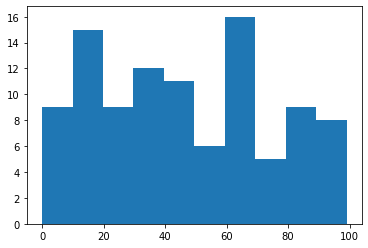

In [8]:
# Create histogram of plot
plt.hist(x)

This profile is quite varied. It does not allow us to determine much based off the limited number of random values. 

(array([1000040., 1000244.,  998928.,  998602., 1000634.,  999963.,
        1001246., 1000658.,  998903., 1000782.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

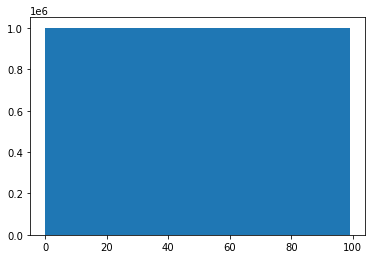

In [9]:
# set size = 10000000
x = rng.integers(100, size=10000000)
plt.hist(x)

When we set the size the ten million we see that the profile of this data is flat. The distribution of numbers into each 20 unit bar seems to be the same.
This is known as a uniform distribution, which is rare in a real world situation. 

* ### Choice 

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

* ### Bytes

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

## <u>Permutations</u>
-----------



* ### Shuffle

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

* ### Permutations

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

# 3. Explain the use and purpose of at least five “Distributions” functions.
------------

* ### Distribution 1: von meises
https://numpy.org/doc/stable/reference/random/generated/numpy.random.vonmises.html#numpy.random.vonmises

In [47]:
mu, kappa = 0.0, 4.0 # mean and dispersion
s = np.random.vonmises(mu, kappa, 1000)

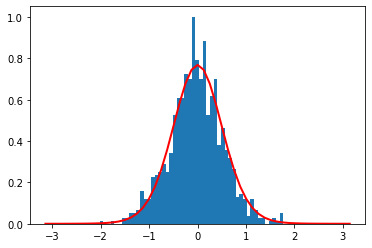

In [48]:
from scipy.special import i0  
plt.hist(s, 50, density=True)
x = np.linspace(-np.pi, np.pi, num=51)
y = np.exp(kappa*np.cos(x-mu))/(2*np.pi*i0(kappa))  
plt.plot(x, y, linewidth=2, color='r')  
plt.show()

Research von meises - familliar from engineering maths. 

* ### Distribution 2: binomial
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

(array([  17.,   75.,  464., 1198., 2108., 2446., 2074., 1122.,  406.,
          90.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

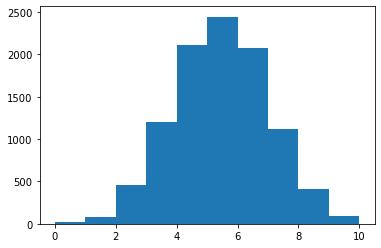

In [40]:
rng = np.random.default_rng()
n, p = 10, .5  # number of trials, probability of each trial
s = rng.binomial(n, p, 10000)
# result of flipping a coin 10 times, tested 1000 times.
plt.hist(s, bins=10, range=None, rwidth=None, color=None, label="tEST")

# matplotlib.pyplot.hist(x, bins=2 range=None, rwidth=None, color=None, label=tEST)

* ### Distribution 3: chisquare
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.chisquare.html#numpy.random.Generator.chisquare

(array([2., 0., 0., 0., 0., 1., 0., 0., 0., 2.]),
 array([0.24989562, 0.53931328, 0.82873094, 1.11814861, 1.40756627,
        1.69698393, 1.9864016 , 2.27581926, 2.56523692, 2.85465458,
        3.14407225]),
 <a list of 10 Patch objects>)

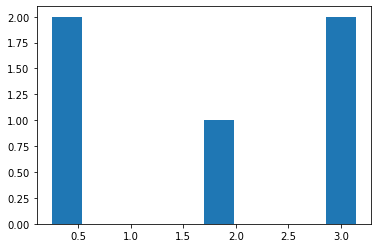

In [44]:
x = np.random.default_rng().chisquare(3,5)
plt.hist(x)

Further investigation needed - do other task first

* ### Distribution 4: Uniform
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform


(array([1000102., 1000613.,  999627.,  999466.,  999909.,  999721.,
         999080., 1002196.,  999389.,  999897.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

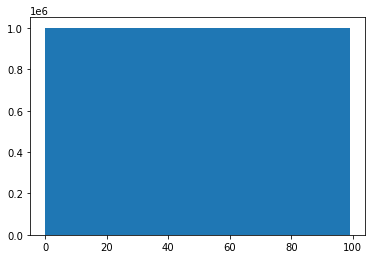

In [10]:
# set size = 10000000
x = rng.integers(100, size=10000000)
plt.hist(x)

This is generally the distribution expected from a computer when a random generated number is needed. So the number 4 is as likely to come out as the number 10,000 etc. It will generate all numbers with the same probability.

* ### Distribution 5: normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal


In [11]:
 # Students heights - centerd around middle. distribouts towards each side. 

(array([ 11.,  24.,  65., 154., 209., 239., 174.,  87.,  33.,   4.]),
 array([-0.31604226, -0.25574544, -0.19544861, -0.13515179, -0.07485496,
        -0.01455814,  0.04573869,  0.10603551,  0.16633233,  0.22662916,
         0.28692598]),
 <a list of 10 Patch objects>)

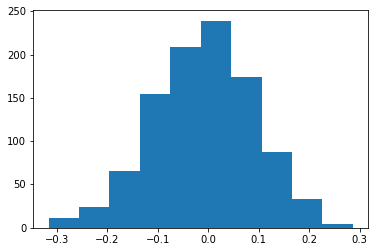

In [45]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
plt.hist(s)

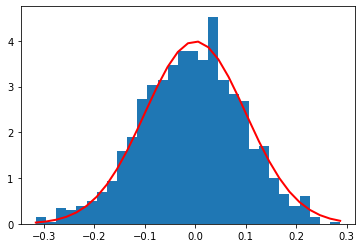

In [46]:
# Probability density function plotted

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

This allows us to match the probability expected with real world data. eg. class heights. etc. 

research Gausian distributions

https://en.wikipedia.org/wiki/Normal_distribution

# NOTE - add extra dividers in distribution curves

# 4. Explain the use of seeds in generating pseudorandom numbers.

------------


https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html#numpy.random.seed

For legacy reasons. Further research needed

### References
----------

[1] https://numpy.org/doc/stable/reference/random/index.html

[2] https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

[3]  https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generatorhttps://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator

[4]

[5] 